_______
_______


# <center>Chapter 9: Integral in n-dimensional space <br><sup><sup><br><br>
_______
_______

In [1]:
import numpy as np
import pandas as pd
import math as m
import matplotlib
import statistics as stats
import scipy.stats as scistats
import matplotlib.pyplot as plt
import matplotlib.colors as color
import os
import sys
import math
import netCDF4 as nc
import statsmodels.api as sm
import shapely
import statistics
import warnings
warnings.filterwarnings("ignore")

from sympy import symbols, diff
from scipy.optimize import fsolve
from matplotlib import cm as cm1
from scipy import optimize as opt
from pandas import read_table
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Polygon
from scipy.ndimage import gaussian_filter
from sklearn.linear_model import LinearRegression

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Style Dictionary to standarize plotting scheme 
# between different python scripts 
styledict = {'xtick.labelsize':21,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':21,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':22,
             'axes.titlesize':22,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

## Monte Carlo method for a double integral on a rectangle

In [3]:
N = 10000
x = np.random.uniform(0,1,N)
y = np.random.uniform(0,1,N)

def f(x,y):
    return(x**2 + y**2)

fbar = np.mean(f(x,y))
V = 1
intf = fbar*V
intf

0.6617908315159803

## Monte Carlo method for a double integral on a disc

In [4]:
N = 100000
# assume radius to be 2
R = 2
# create a matrix of shape N rows x 3 columns
p = (np.random.uniform(-R,R,3*N)).reshape(N,3)

k = 0
# redefine k based on matrix multiplication of p
for i in range(N):
    if np.matmul(p[i,],p[i,]) < R**2:
        k = k+1
        
V = (k/N)*(2*R)**3
V

33.42144

## Example 9.4: Volume of a spherical cap Monte Carlo

In [5]:
N = 100000
# work on the unit ball
R = 1
phi = 66.5*np.pi/180

# create N x 3 matrices
p = (np.random.uniform(-R,R,3*N)).reshape(N,3)
r = np.zeros(3*N).reshape(N,3)
s = np.zeros(3*N).reshape(N,3)

k = 0
for i in range(N):
    if np.matmul(p[i,],p[i,]) < R**2:
        k = k+1
        r[k,] = p[i,]
        
# points inside the ball
m = 0
for i in range(k):
    if r[i,2] >= R*np.sin(phi):
        m = m + 1
        s[m,] = r[i,]

V = (m/N)*(2*R)**3
# cap volume is V*R^3
print(V)

# approximate percentage of ball's volume
print(V/(4*np.pi/3))

0.02112
0.005042028597151245


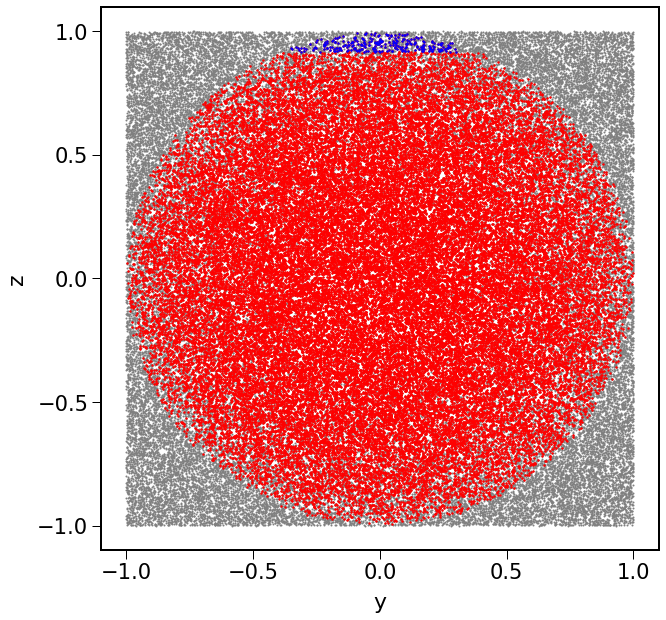

In [6]:
# set up plot
plt.figure(figsize = (10,10))

# plot points in y-z plane when x = 0
plt.scatter([p[:,1]], [p[:,2]], color = 'grey', s = 1)
plt.scatter([r[:k,1]],[r[:k,2]], color = 'r', s = 2)
plt.scatter([s[1:m,1]], [s[1:m,2]], color = 'b', s = 2)

# set axis labels
plt.xlabel("y", labelpad = 10)
plt.ylabel("z", labelpad = 10)
plt.yticks([-1,-0.5,0,0.5,1])

plt.show()

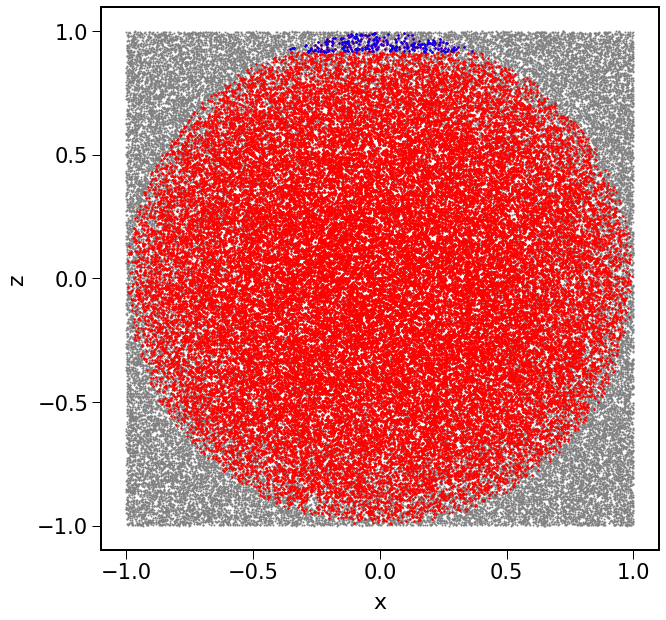

In [7]:
# set up plot
plt.figure(figsize = (10,10))

# plot points in x-z plane when y = 0
plt.scatter([p[:,0]], [p[:,2]], color = 'grey', s = 1)
plt.scatter([r[:k,0]],[r[:k,2]], color = 'r', s = 2)
plt.scatter([s[1:m,0]], [s[1:m,2]], color = 'b', s = 2)

# set axis labels
plt.xlabel("x", labelpad = 10)
plt.ylabel("z", labelpad = 10)
plt.yticks([-1,-0.5,0,0.5,1])

plt.show()

## Monte Carlo integral without plotting

In [8]:
N = 100000
# working on the unit ball
R = 1
phi = 66.5*np.pi/180
p = (np.random.uniform(-R,R,3*N)).reshape(N,3)

k = 0
for i in range(N):
    if (np.matmul(p[i,],p[i,]) < R**2) and (p[i,2] >= R*np.sin(phi)):
        k = k+1
        
print((k/N)*(2*R)**3)

0.0204


## Monte Carlo integral int_D exp(-x^2 - y^2)

In [38]:
N = 100000
R = 2
phi = 66.5*np.pi/180
p = (np.random.uniform(-R,R,2*N)).reshape(N,2)
q = (np.random.uniform(-R,R,2*N)).reshape(N,2)

def f(x,y):
    return(math.exp(-x**2 - y**2))

k = 0
for i in range(N):
    if np.matmul(p[i,],p[i,]) < R**2:
        k = k+1
        q[k,] = p[i,]
        
x = q[:k,0]
y = q[:k,1]

# calculate f(x,y) for pairs of x,y
func = []
for j in range(len(x)):
    value = f(x[j],y[j])
    func.append(value)
    
# the integral
np.mean(func)*np.pi*R**2

## Monte Carlo method on a sphere